# Recommender Systems

In [354]:
import pandas as pd
import seaborn as sns

sns.set_style("whitegrid")

In [355]:
col_names = ["user_id", "item_id", "rating", "timestamp"]
df = pd.read_csv("./filez/Movie_u.data", sep="\t", names=col_names)  # tab separated
df.head()

,user_id,item_id,rating,timestamp
0,0,50,5,881250949
1,0,172,5,881250949
2,0,133,1,881250949
3,196,242,3,881250949
4,186,302,3,891717742


In [356]:
movie_titles = pd.read_csv("./filez/Movie_Id_Titles")
movie_titles.head(3)

,item_id,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)


In [357]:
df = pd.merge(df, movie_titles, on="item_id")
df.head(3)

,user_id,item_id,rating,timestamp,title
0,0,50,5,881250949,Star Wars (1977)
1,290,50,5,880473582,Star Wars (1977)
2,79,50,4,891271545,Star Wars (1977)


In [358]:
# show average rating per title
df.groupby("title")["rating"].mean().sort_values(ascending=False).head()

title
They Made Me a Criminal (1939)                5.0
Marlene Dietrich: Shadow and Light (1996)     5.0
Saint of Fort Washington, The (1993)          5.0
Someone Else's America (1995)                 5.0
Star Kid (1997)                               5.0
Name: rating, dtype: float64

In [359]:
# show number of votes per title
df.groupby("title")["rating"].count().sort_values(ascending=False).head()

title
Star Wars (1977)             584
Contact (1997)               509
Fargo (1996)                 508
Return of the Jedi (1983)    507
Liar Liar (1997)             485
Name: rating, dtype: int64

In [360]:
ratings = pd.DataFrame(df.groupby("title")["rating"].mean())
ratings.head()

,rating
title,
'Til There Was You (1997),2.333333
1-900 (1994),2.600000
101 Dalmatians (1996),2.908257
12 Angry Men (1957),4.344000
187 (1997),3.024390


In [361]:
ratings["votes"] = pd.DataFrame(df.groupby("title")["rating"].count())
ratings.head()

,rating,votes
title,,
'Til There Was You (1997),2.333333,9
1-900 (1994),2.600000,5
101 Dalmatians (1996),2.908257,109
12 Angry Men (1957),4.344000,125
187 (1997),3.024390,41


## Exploratory Data Analysis

<Axes: xlabel='votes', ylabel='Count'>

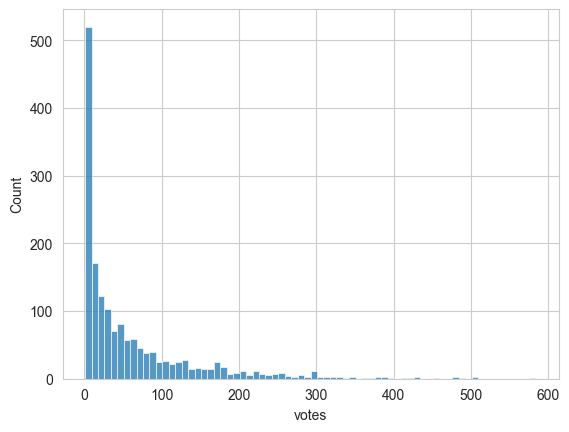

In [362]:
# num. ratings: most movies have very little votes
sns.histplot(data=ratings, x="votes", bins=70)

<Axes: xlabel='rating', ylabel='Count'>

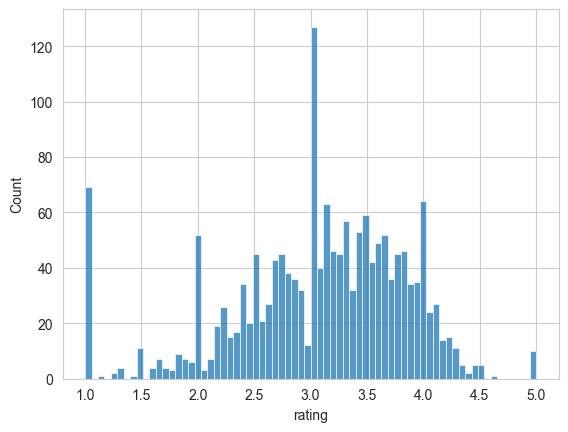

In [363]:
# ratings: people normally give a whole number star (i.e.: 1,2,3,4,5)
sns.histplot(data=ratings, x="rating", bins=70)

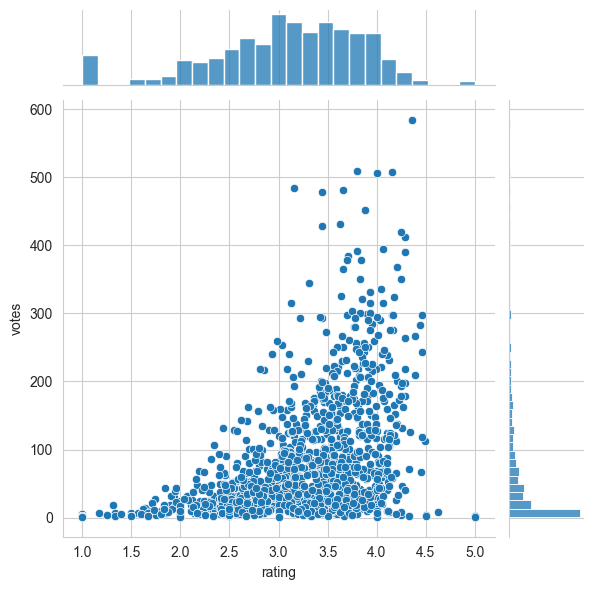

In [364]:
# the more votes, the higher rating
sns.jointplot(data=ratings, x="rating", y="votes")

## Reco System

In [365]:
df.head(3)

,user_id,item_id,rating,timestamp,title
0,0,50,5,881250949,Star Wars (1977)
1,290,50,5,880473582,Star Wars (1977)
2,79,50,4,891271545,Star Wars (1977)


In [366]:
ratings.head(3)

,rating,votes
title,,
'Til There Was You (1997),2.333333,9
1-900 (1994),2.600000,5
101 Dalmatians (1996),2.908257,109


In [367]:
ratings.sort_values("votes", ascending=False).head()

,rating,votes
title,,
Star Wars (1977),4.359589,584
Contact (1997),3.803536,509
Fargo (1996),4.155512,508
Return of the Jedi (1983),4.007890,507
Liar Liar (1997),3.156701,485


In [368]:
# matrix format -> user_id by title on ratings
moviemat = df.pivot_table(index="user_id", columns="title", values="rating")
moviemat.head()

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [369]:
# see ratings from two specific titles
starwars_user_rating = moviemat["Star Wars (1977)"]
liarliar_user_rating = moviemat["Liar Liar (1997)"]

starwars_user_rating.head()

user_id
0    5.0
1    5.0
2    5.0
3    NaN
4    5.0
Name: Star Wars (1977), dtype: float64

In [370]:
# correlation between rows or columns of two df
similar_to_starwars = moviemat.corrwith(starwars_user_rating)
similar_to_starwars.head(3)

/Users/wint3rmute/Gro/datascilabs/venv/lib/python3.12/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/Users/wint3rmute/Gro/datascilabs/venv/lib/python3.12/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
/Users/wint3rmute/Gro/datascilabs/venv/lib/python3.12/site-packages/numpy/lib/function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/Users/wint3rmute/Gro/datascilabs/venv/lib/python3.12/site-packages/numpy/lib/function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
/Users/wint3rmute/Gro/datascilabs/venv/lib/python3.12/site-packages/numpy/lib/function_base.py:2748: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


title
'Til There Was You (1997)    0.872872
1-900 (1994)                -0.645497
101 Dalmatians (1996)        0.211132
dtype: float64

Warning explanations:
- `Invalid value encountered in divide (c /= stddev[:, None] and c /= stddev[None, :])`:
This warning often occurs when the standard deviation (stddev) is zero or very close to zero. When calculating correlation, the standard deviation is used in the denominator. If it's zero (which can happen if all values in a column are the same), you end up with a division by zero, leading to an invalid value.
- `Degrees of freedom <= 0 for slice (c = cov(x, y, rowvar, dtype=dtype)`):
This warning is related to the degrees of freedom in the covariance calculation. If there's insufficient data (e.g., too many NaN values or a column with all NaNs), the degrees of freedom can be zero or negative, which is not valid for performing covariance calculations.
- `Divide by zero encountered in divide (c *= np.true_divide(1, fact))`:
This is a more explicit warning about a division by zero occurring in the computation, which is again linked to the standard deviation being zero.
- `Invalid value encountered in multiply (c *= np.true_divide(1, fact))`:
This can occur if the result of a calculation is NaN or infinity, often as a consequence of the issues mentioned above.

In [371]:
corr_starwars = pd.DataFrame(similar_to_starwars, columns=["Correlation"]).dropna()
corr_starwars.head(3)

,Correlation
title,
'Til There Was You (1997),0.872872
1-900 (1994),-0.645497
101 Dalmatians (1996),0.211132


In [372]:
# this can lead to weird correlations if a user happen to watch
# these movies and also rated 5 to Star Wars
corr_starwars.sort_values("Correlation", ascending=False).head(10)

,Correlation
title,
Hollow Reed (1996),1.0
Commandments (1997),1.0
Cosi (1996),1.0
No Escape (1994),1.0
Stripes (1981),1.0
Star Wars (1977),1.0
Man of the Year (1995),1.0
"Beans of Egypt, Maine, The (1994)",1.0
"Old Lady Who Walked in the Sea, The (Vieille qui marchait dans la mer, La) (1991)",1.0


In [373]:
# - Filter movies that have less than a certain num. of reviews
# - From the historical plot, seems that from 100 onwards the votes
#   have less significance
# - Using join instead of merge because the title is the index of the df's
corr_starwars = corr_starwars.join(ratings["votes"])
corr_starwars.head()

,Correlation,votes
title,,
'Til There Was You (1997),0.872872,9
1-900 (1994),-0.645497,5
101 Dalmatians (1996),0.211132,109
12 Angry Men (1957),0.184289,125
187 (1997),0.027398,41


In [374]:
# Filter by movies above 100 ratins
corr_starwars[corr_starwars["votes"] > 100].sort_values(
    "Correlation", ascending=False
).head(5)

,Correlation,votes
title,,
Star Wars (1977),1.000000,584
"Empire Strikes Back, The (1980)",0.748353,368
Return of the Jedi (1983),0.672556,507
Raiders of the Lost Ark (1981),0.536117,420
Austin Powers: International Man of Mystery (1997),0.377433,130


In [375]:
similar_to_liarliar = moviemat.corrwith(liarliar_user_rating)
corr_liarliar = pd.DataFrame(similar_to_liarliar, columns=["Correlation"]).dropna()
corr_liarliar = corr_liarliar.join(ratings["votes"])
corr_liarliar.head()

/Users/wint3rmute/Gro/datascilabs/venv/lib/python3.12/site-packages/numpy/lib/function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/Users/wint3rmute/Gro/datascilabs/venv/lib/python3.12/site-packages/numpy/lib/function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
/Users/wint3rmute/Gro/datascilabs/venv/lib/python3.12/site-packages/numpy/lib/function_base.py:2748: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
/Users/wint3rmute/Gro/datascilabs/venv/lib/python3.12/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/Users/wint3rmute/Gro/datascilabs/venv/lib/python3.12/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


,Correlation,votes
title,,
'Til There Was You (1997),0.118913,9
101 Dalmatians (1996),0.469765,109
12 Angry Men (1957),0.066272,125
187 (1997),0.175145,41
2 Days in the Valley (1996),0.040739,93


In [376]:
corr_liarliar[corr_liarliar["votes"] > 100].sort_values(
    "Correlation", ascending=False
).head()

,Correlation,votes
title,,
Liar Liar (1997),1.000000,485
Batman Forever (1995),0.516968,114
"Mask, The (1994)",0.484650,129
Down Periscope (1996),0.472681,101
Con Air (1997),0.469828,137
